# Take Aways

* LDa can also have a linear projection just like PCA!!!

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

([array([ 100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   50.]),
  array([ 50.,   0.,   0.,   0.,  51.,   4.,   0.,   1.,   1.,  43.]),
  array([ 93.,   1.,   1.,   0.,   4.,  51.,   0.,   0.,   0.,   0.])],
 array([  1.44324791e-44,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

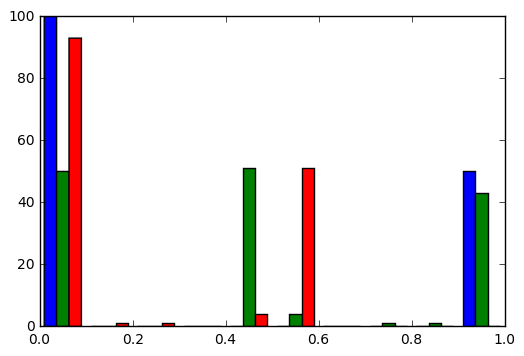

In [6]:
plt.hist(lda.predict_proba(X)) # so LDA is supervised, but it can also just do linear transformation =)

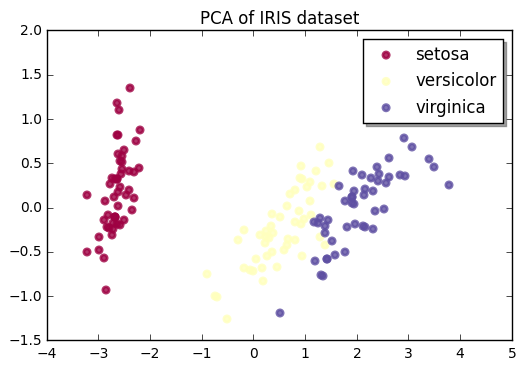

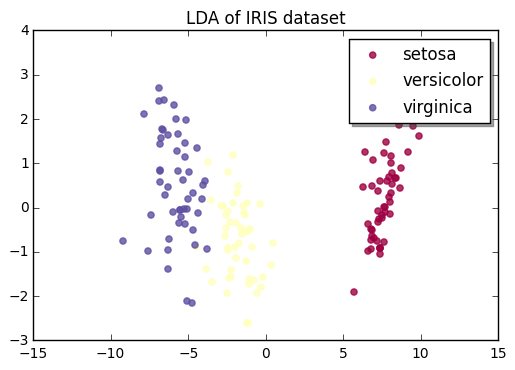

In [16]:
plt.figure()
# colors = ['navy', 'turquoise', 'darkorange']
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(y))))

lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=True, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=True, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [20]:
# lda transform --> (X - X_bar) dot (scalings_)
print lda.xbar_ # this is the mean
print lda.scalings_

[ 5.84333333  3.054       3.75866667  1.19866667]
[[ 0.81926852  0.03285975]
 [ 1.5478732   2.15471106]
 [-2.18494056 -0.93024679]
 [-2.85385002  2.8060046 ]]


In [21]:
print lda.transform(X[:2,:])

[[ 8.0849532   0.32845422]
 [ 7.1471629  -0.75547326]]


In [23]:
print np.dot(X[:2,:] - lda.xbar_, lda.scalings_) # just to demonstrate the difference

[[ 8.0849532   0.32845422]
 [ 7.1471629  -0.75547326]]
